In [3]:
import numpy as np
import pandas as pd
import sklearn as sk

In [4]:
data = pd.read_csv("./data/Global YouTube Statistics.csv", encoding='latin1')
# 파일의 인고딩 형식이 utf-8이 아닌 latin-1이브로 encoding도 이에 맞춰 줘야 한다.
# 만일 그렇지 않으면 UnicodeDecodeError와 같은 에러가 발생해 파일을 읽지 못하거나 내용이 손상될 수 있다.

###  데이터 셋 개요 </b>

* 데이터 셋: YouTube Statistics
* 데이터 셋 개요: YouTube Statistics는 YouTube 상위 채널의 통계자료에 대한 데이터셋입니다. 데이터셋은 데이터 분석 및 모델링 대회 플랫폼 Kaggle [링크](https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023) 에서 다운받을 수 있으며, 자세한 데이터셋 설명까지 확인할 수 있습니다. 데이터는 직접 다운받거나, kaggle API를 이용할 수 있습니다. 데이터셋은 총 995개의 채널 데이터와 유튜버와 채널 구독자 수, 채널의 모든 동영상의 조회수, 카테고리, 월 수입 등 28개의 변수를 포함합니다. 이 데이터셋은 타겟 변수가 따로 정해져있지 않기 때문에 분석 목표는 임의로 지정하여야 합니다. 인기 YouTube 채널의 성공요인에 대한 분석을 원할 수도 있고, 채널 별 월 수입에 대한 분석을 할 수 있습니다.
* 데이터 셋 저작권: Other (specified in description - [link](https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023))
* [Kaggle Dataset page](https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023)


In [5]:
data.head(10)
#위의 10개만 확인함으로서 데이터가 잘 불러와 졌는지 확인한다.

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [6]:
print(data.shape) # 데이터의 크기 확인

(995, 28)


In [7]:
data.columns # 데이터의 컬럼 이름 확인하기

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [8]:
data.info() # 데이터 정보 총괄적으로 확인(Dtype 확인이 중요함)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [9]:
#여러번 실행해도 같은 결과가 나오도록 seed 고정
np.random.seed(1111)

In [10]:
# 살펴볼 피쳐의 인덱스를 랜덤으로 선택
feature_index = np.random.choice(len(data.columns)) # columns 개수 만큼의 숫자중 하나를 랜덤으로 선택
print(f"피쳐번호 : {feature_index}")

#데이터 셋에서 인덱스에 해당하는 피쳐 이름을 가져오고, 이를 이용해 다시 데이터에서 피쳐를 선택
feature_name = data.columns[feature_index]
print(f"피쳐이름: {feature_name}")
data[feature_name]

피쳐번호 : 23
피쳐이름: Population


0      1.366418e+09
1      3.282395e+08
2      3.282395e+08
3      3.282395e+08
4      1.366418e+09
           ...     
990    2.125594e+08
991    1.366418e+09
992    6.683440e+07
993    1.028545e+07
994    1.366418e+09
Name: Population, Length: 995, dtype: float64

In [11]:
# 범주형 변수의 탐색

# 분석할 feature의 이름
feature_name = "channel_type" # 범주형 이름이 필요하기 때문에 random 돌리기 안함

# 중복값 제거
unique_values = data[feature_name].unique() # 고유한 값을 가지는 data = 하나밖에 없는 데이터 = 중복 x 가짓수
print(f"범주 : {unique_values}")
print(f"범주 수 : {len(unique_values)}")

범주 : ['Music' 'Games' 'Entertainment' 'Education' 'People' 'Sports' 'Film'
 'News' nan 'Comedy' 'Howto' 'Nonprofit' 'Autos' 'Tech' 'Animals']
범주 수 : 15


In [12]:
data[feature_name].value_counts() # 각 범주 별, 샘플 개수 확인

channel_type
Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64

In [13]:
# 임의의 샘플 선택
sample_index = np.random.choice(len(data))
print(f"샘플 인덱스 : {sample_index}")

# 선택된 데이터 확인
data.iloc[sample_index] # .loc 함수 = [,'변수명'] / .iloc 함수 = [0,0] 숫자가 들어가냐 label이 들어가냐 차

샘플 인덱스 : 741


rank                                                   742
Youtuber                                          BBC News
subscribers                                       14500000
video views                                   4598387043.0
category                                   News & Politics
Title                                             BBC News
uploads                                              18972
Country                                     United Kingdom
Abbreviation                                            GB
channel_type                                          News
video_views_rank                                    1548.0
country_rank                                          26.0
channel_type_rank                                     19.0
video_views_for_the_last_30_days                66273000.0
lowest_monthly_earnings                            16600.0
highest_monthly_earnings                          265100.0
lowest_yearly_earnings                            198800

In [14]:
#데이터 내 결측치 확인
data.isnull() # 결측치가 있다면 True 값이 존재하면 False를 집어 넣음

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
992,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# 결측치 개수 확인
data.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [16]:
# 결측치를 하나라도 포함하는 행의 인덱스를 확인
sample_indices_with_nan = data.isnull().sum(axis=1) > 0 # 해당 변수 안에는 1번 행을 모두 더했을 때 1이상인 즉 결측치가 존재하는 행들만 들어감
data[sample_indices_with_nan]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,126226568.0,2.29,115782416.0,36.204824,138.252924
12,13,Gaming,93600000,0.000000e+00,NaN,Gaming,0,NaN,NaN,Games,...,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,984,MoniLina,12400000,1.608681e+10,Comedy,MoniLinaFamily,0,United States,US,People,...,100.0,2016.0,May,10.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
985,986,TKOR,12400000,3.392023e+09,Education,TKoR,0,NaN,NaN,People,...,NaN,2006.0,Aug,16.0,NaN,NaN,NaN,NaN,NaN,NaN
986,987,ANNA KOVA,12400000,1.395959e+10,People & Blogs,annakova,1,NaN,NaN,Film,...,NaN,2006.0,Jun,18.0,NaN,NaN,NaN,NaN,NaN,NaN
987,988,Avril Lavigne,12400000,6.202090e+09,Music,Avril Lavigne,205,United States,US,Music,...,NaN,2005.0,Oct,8.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891


In [17]:
# 결측치를 가진 행들 중 Movies, Music 등 실제 유튜버가 아닌 영상 카테고리 샘플이 NaN 되어 이쓴 것을 확인 할 수 있다.
# 따라서 "122~123개의 행에서 8개의 변수의 값이 공통으로 비어 있을 것이다" 라는 가설을 세우고 이를 검증한다.

sample_indices_with_nan = data.isnull().sum(axis=1) >= 8 # 결측치 8개이상 포함하는 행의 index
data_with_NaNs = data[sample_indices_with_nan]
print(len(data_with_NaNs), "\n")
data_with_NaNs


123 



,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.000000e+00,NaN,Gaming,0,NaN,NaN,Games,...,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
14,15,Goldmines,86900000,2.411823e+10,Film & Animation,goldmines,1,NaN,NaN,Music,...,NaN,2006.0,Aug,15.0,NaN,NaN,NaN,NaN,NaN,NaN
38,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,3.231243e+10,Music,LooLoo Kids - Nursery Rhymes and Children's ï¿½,11,NaN,NaN,NaN,...,NaN,2016.0,Nov,29.0,NaN,NaN,NaN,NaN,NaN,NaN
48,49,Badabun,46800000,1.939805e+10,Entertainment,badabun,1,NaN,NaN,Music,...,75.0,2007.0,Jul,21.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,959,Troom Troom PT,12500000,4.384178e+09,Howto & Style,Troom Troom PT,2738,NaN,NaN,Howto,...,NaN,2015.0,Apr,19.0,NaN,NaN,NaN,NaN,NaN,NaN
967,968,Troom Troom Indonesia,12500000,5.379684e+09,People & Blogs,TROOM TROOM INDONESIA,8,NaN,NaN,People,...,NaN,2020.0,Jul,29.0,NaN,NaN,NaN,NaN,NaN,NaN
972,973,Hero Movies 2023,12400000,1.689091e+09,People & Blogs,Hero Movies 2023,689,NaN,NaN,People,...,NaN,2017.0,Feb,22.0,NaN,NaN,NaN,NaN,NaN,NaN
985,986,TKOR,12400000,3.392023e+09,Education,TKoR,0,NaN,NaN,People,...,NaN,2006.0,Aug,16.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# NA를 가진 feature들을 변수로 정의하여 확인합니다.
columns_with_nan = [
  "Country",
  "Abbreviation",
  "Gross tertiary education enrollment (%)",
  "Population",
  "Unemployment rate",
  "Urban_population",
  "Latitude",
  "Longitude"
]
# 위에서 선택한 8개 feature들이, 가설대로 모두 NaN인지 확인해봅니다.
data_with_NaNs[columns_with_nan].isnull().all(axis=1).sum()

np.int64(122)

In [19]:
# 구독자 수는 음수가 될 수 없기 때문에 음수의 구독자 수를 가진 사람이 있는지 확인한다.
(data['subscribers']<0).any()

np.False_

In [20]:
# 위도와 경도 각 변수의 최솟값과 최댓값 확인
print(data[['Latitude','Longitude']].min())
print(data[['Latitude','Longitude']].max())

Latitude     -38.416097
Longitude   -172.104629
dtype: float64
Latitude      61.924110
Longitude    138.252924
dtype: float64


In [21]:
# 데이터 요약통계량 보기
data.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [22]:
# 데이터 시각화를 위한 패키지 임포트
import matplotlib.pyplot as plt
import seaborn as sns

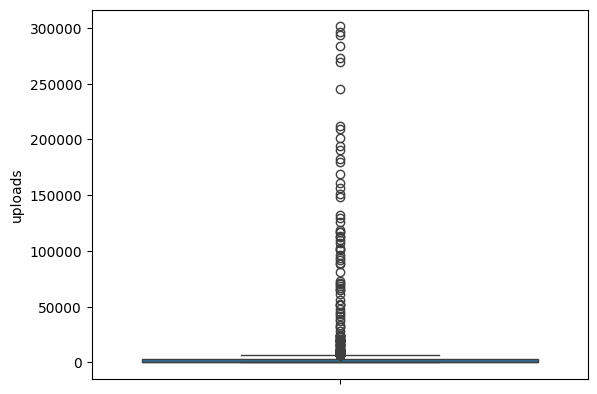

In [23]:
# boxplot을 확인할 변수를 선택합니다. 여기에서 다른 피쳐를 지정하면 다른 피쳐에도 boxplot을 그릴 수 있습니다.

target_feature = data.columns[6]            #columns 를 바꾸기 쉽도록 함수로 바꿈
sns.boxplot(data=data, y=target_feature)
plt.show()

In [24]:
# 이상치 제거를 위한 분위수 확인하기
Q3 = data[target_feature].quantile(q=0.75)  # 75% 분위수
Q1 = data[target_feature].quantile(q=0.25)  # 25% 분위수
IQR = Q3-Q1
print(f" Q1 : {Q1}\n Q3 : {Q3} \n IQR : {IQR}")

 Q1 : 194.5
 Q3 : 2667.5 
 IQR : 2473.0


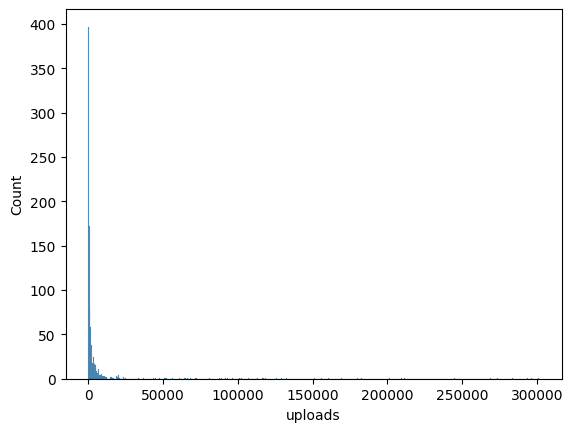

In [25]:
# 히스토그램 보기
sns.histplot(data=data, x=target_feature)  # 히스토그램 그리기, kde 옵션은 막대 뿐만 아니라 밀도 형태의 선으로도 보여주는 것
plt.show()  # 그림 보여주기

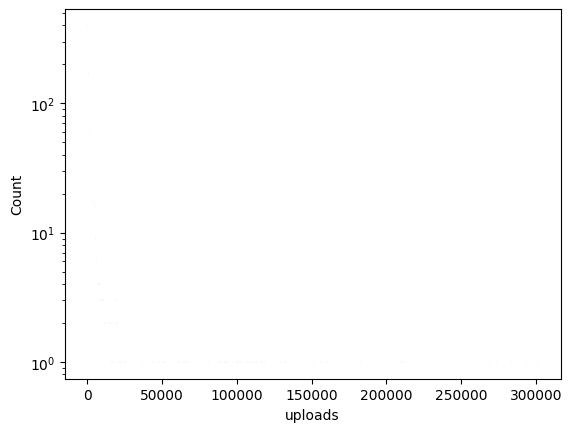

In [26]:
# 꼬리가 긴 분포를 가진 변수의 히스토그램을 로그스케일로 확인하기.
# log scale을 이요하는 이유는 얼마나 증감하는지를 비교하기 위해서임다.
sns.histplot(data=data, x=target_feature, log_scale=(False, True))
plt.show()  # 그림 보여주기

C:\Users\jihu6\AppData\Local\Temp\ipykernel_30216\505981756.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(labels, rotation=90)


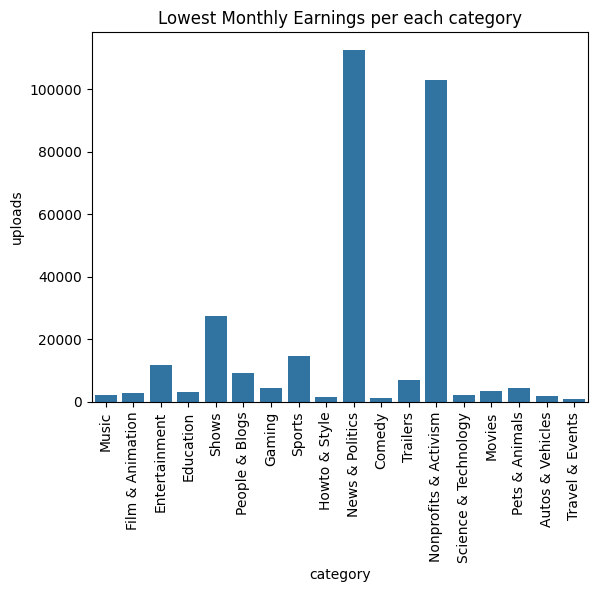

In [27]:
# 막대그래프의 막대로 범주를 확인할 변수
category_feature = 'category'
# 막대그래프의 높이로 값을 확인할 변수 = target feature

# 막대그래프 생성
barplot = sns.barplot(data=data, x=category_feature, y=target_feature, color='C0', errorbar=None)

# matplotlib에서 x축 레이블의 위치, 방향 설정을 변경합니다.
loc, labels = plt.xticks()
barplot.set_xticklabels(labels, rotation=90)

plt.title('Lowest Monthly Earnings per each category')
plt.show()

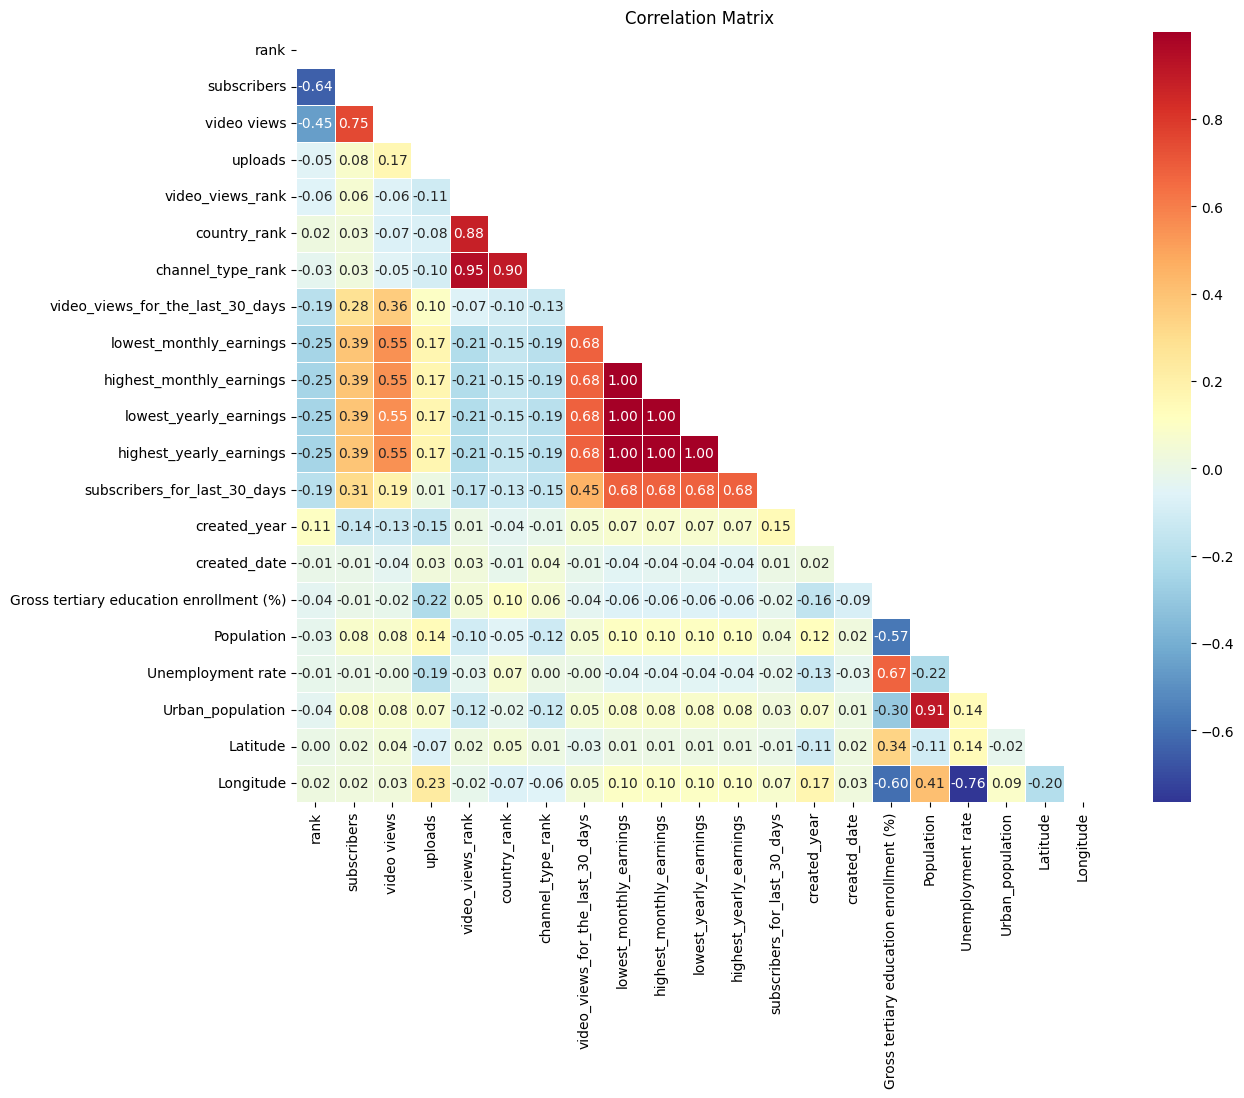

In [28]:
# 데이터의 상관계수 행렬을 생성
corr = data.corr(numeric_only=True)  # 데이터셋으로부터 각 변수별 상관계수를 계산하여 행렬형태로 나타내는 함수. 여기서는 피어슨 상관계수를 이용
# numeric_only는 숫자형 변수만 상관계수를 계산하도록 하는 옵션
# figure에서 생략될 부분을 지정하는 mask 행렬을 생성 - 실제로는 mask 없이 다 생성해도 괜찮습니다.
mask = np.ones_like(corr, dtype=bool)
mask = np.triu(mask)

# 시각화될 그림의 크기를 지정
# 히트맵 형태로 상관행렬 시각화하기
plt.figure(figsize=(13,10))
sns.heatmap(data=corr, annot=True, fmt='.2f', mask=mask, linewidths=.5, cmap='RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

상관관계가 1에 가까울수록 상관 관계가 크다는 것을 의미함. 따라서 highest_monthly_earnings와 lowest_monthly_earnings는 상관관계가 1로 양의 상관관계로 존재함을 확인할 수 있음
상관관계가 1.0 혹은 -1.0 이라는 말은 독립적으로 다룰 수 없는 변수라는 것을 의미함(무조건은 아니지만 가능성이 무척 큼)

일반적으로 변수들 사이의 공선성이나 다중공선성이 나타나는 경우 관련 변수를 제거하여 모든 변수가 독립적으로 다루어지도록 만드는 방법을 사용한다.

In [29]:
# 분석을 완료한 데이터 샘플 123개의 인덱스 확인
indices_to_keep = data.isnull().sum(axis=1) < 8

# 샘플을 제거. 비교를 위해 원본 데이터는 별도로 복사해둠.
data_original = data
data = data[indices_to_keep].copy()
print(f"데이터 샘플 수 변화: {len(data_original)} -> {len(data)}")

# 나머지 결측치중 가장 많은 비중을 차지하는 subscribers_for_last_30_days에서 NaN을 0으로 대체
data["subscribers_for_last_30_days"].fillna(0)

# 나머지 결측치를 포함하는 모든 행들은 버림(drop). axis=0일 경우 결측치가 있는 행을, axis=1이면 열을 전부 제거한다.
data.dropna(axis=0, inplace=True)
print(f"처리 완료 후 데이터 샘플 수: {len(data)}")

# 결측치가 잘 제거되었는지 확인
data.isnull().sum()

데이터 샘플 수 변화: 995 -> 872
처리 완료 후 데이터 샘플 수: 554


rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

데이터의 분포를 변환 하기 위해 log scale로 변환. 위에 코드들은 target_feature가 달라지기 때문에 와닿지 않을 뿐...
=

In [30]:
#데이터 분포 변환을 위한 scikit-learn 패키지 내 함수 불러요기
from sklearn.preprocessing import scale

# 로그변환을 진행할 변수를 선택합니다. 여기에서 다른 피쳐를 지정하면 다른 피쳐에도 로그변환을 진행해볼 수 있습니다.
target_feature = 'lowest_monthly_earnings'
# 데이터 로그 변환
# 로그 스케일로 변환한 값으로 새 변수를 만듭니다. 새 변수명은 기존 변수명에 prefix를 붙입니다.
data[f'log_{target_feature}'] = scale(np.log(data[target_feature]+1))  # log에 0값이 들어가는 것을 피하기 위해 1을 더해줍니다.
# 로그변환한 변수의 요약통계량 보기
data[f'log_{target_feature}'].describe()

count    5.540000e+02
mean     3.591191e-16
std      1.000904e+00
min     -3.797872e+00
25%     -1.430808e-01
50%      2.035762e-01
75%      4.899371e-01
max      1.380709e+00
Name: log_lowest_monthly_earnings, dtype: float64

In [31]:
# 변환 전후 데이터 요약 통계량 비교하기
data[[target_feature, f'log_{target_feature}']].describe()

,lowest_monthly_earnings,log_lowest_monthly_earnings
count,554.000000,5.540000e+02
mean,52604.206895,3.591191e-16
std,76120.564578,1.000904e+00
min,0.000000,-3.797872e+00
25%,11625.000000,-1.430808e-01
50%,28250.000000,2.035762e-01
75%,58825.000000,4.899371e-01
max,576000.000000,1.380709e+00


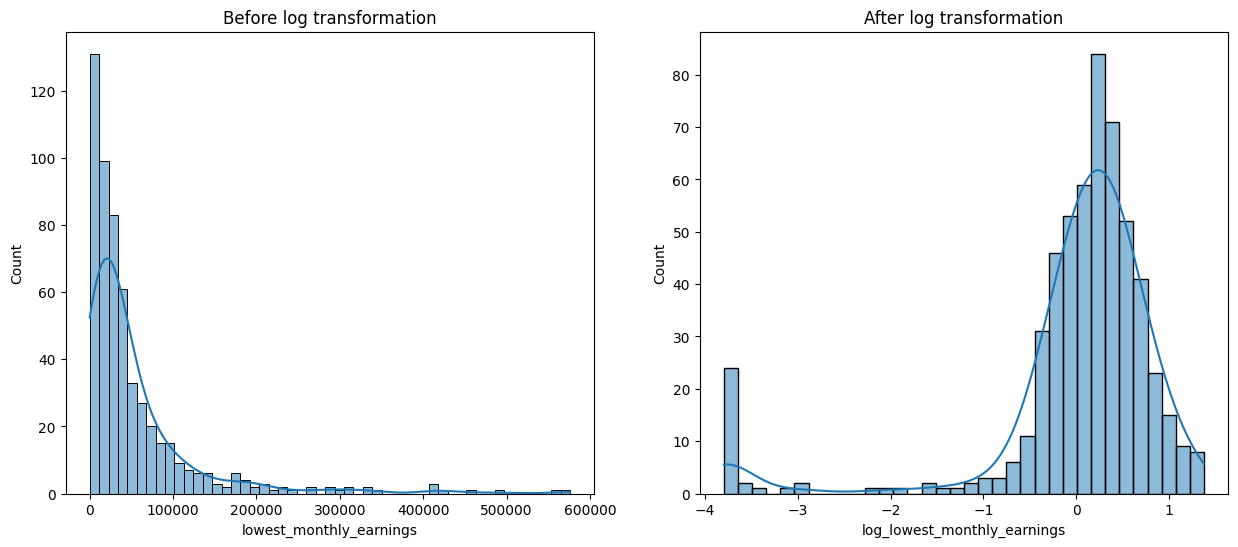

In [32]:
# 데이터 분포 변환 전후를 비교하기 위해 2개의 plot 지정
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# 히스토그램으로 변환 전 데이터의 분포 보기
sns.histplot(data=data, x=target_feature, kde=True, ax=ax[0])
ax[0].set_title('Before log transformation')
# 히스토그램으로 변환 후 데이터의 분포 보기
sns.histplot(data=data, x=f'log_{target_feature}', kde=True, ax=ax[1])
ax[1].set_title('After log transformation')
plt.show()

In [33]:
# 데이터 분포 변환을 위한 scikit-learn 패키지 내 함수 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
# 스케일링을 진행할 변수를 선택
target_feature = 'lowest_monthly_earnings'
# scikit-learn패키지를 활용한 standardization
standard_scaler = StandardScaler()
data[f'standardized_{target_feature}'] = standard_scaler.fit_transform(data[[target_feature]]) 
# 표준화한 데이터를 새로운 변수에 저장하기

In [35]:
# 비교를 위해 변환 전후의 피쳐를 선택
feature_original = data[target_feature]
feature_standardized = data[f'standardized_{target_feature}']

# 변환 전후의 평균, 표준편차 비교
print(f"평균(mean)비교: {feature_original.mean():.7} -> {feature_standardized.mean():.7}")
print(f"표준편차(standard deviation)비교: {feature_original.std():.7} -> {feature_standardized.std():.7}")

평균(mean)비교: 52604.21 -> 1.026054e-16
표준편차(standard deviation)비교: 76120.56 -> 1.000904


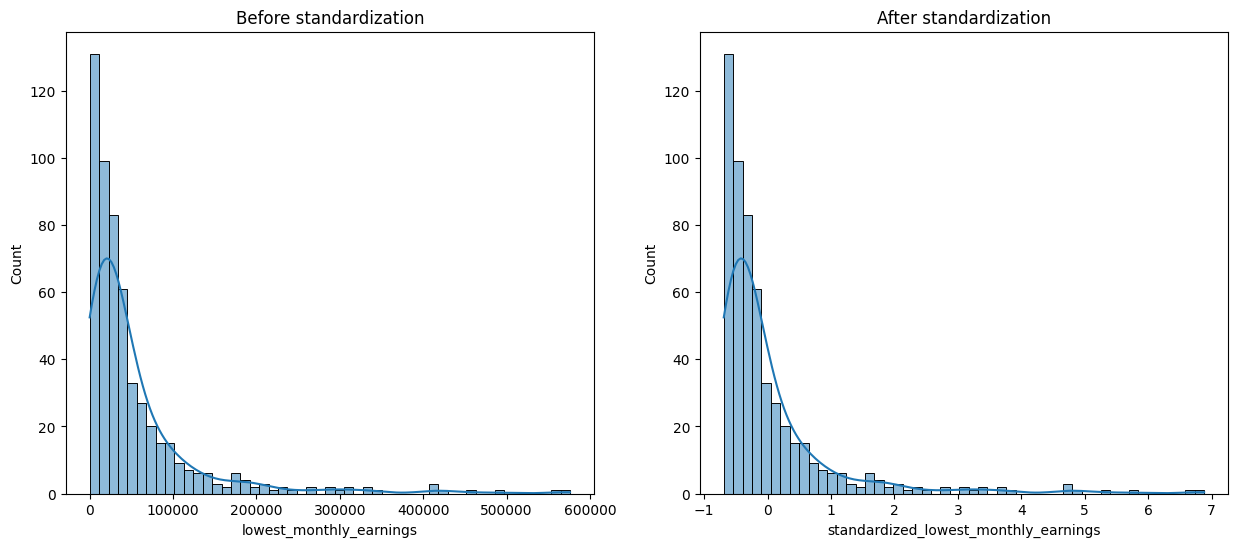

In [36]:
# 데이터 단위 변환 전후 비교
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))  # 데이터 단위 변환 전후를 비교하기 위해 2개의 plot 지정
# 히스토그램으로 변환 전 데이터의 분포 보기
sns.histplot(data=data, x=target_feature, kde=True, ax=ax[0])
ax[0].set_title('Before standardization')
# 히스토그램으로 변환 후 데이터의 분포 보기
sns.histplot(data=data, x=f'standardized_{target_feature}', kde=True, ax=ax[1])
ax[1].set_title('After standardization')
plt.show()

In [38]:
# 스케일링을 진행할 변수를 선택합니다. 여기에서 다른 피쳐를 지정하면 다른 피쳐에도 표준화를 진행해볼 수 있습니다.
target_feature = 'lowest_monthly_earnings'
# scikit-learn패키지를 활용한 normalization
normalized_scaler = MinMaxScaler()
data[f'normalized_{target_feature}'] = normalized_scaler.fit_transform(data[[target_feature]])  # 표준화한 데이터를 새로운 변수에 저장하기

In [39]:
# 비교를 위해 변환 전후의 피쳐를 선택
feature_original = data[target_feature]
feature_normalized = data[f'normalized_{target_feature}']

# 변환 전후의 최대, 최소값 비교
print(f"최소값(min) 비교: {feature_original.min():.7} -> {feature_normalized.min():.7}")
print(f"최대값(max) 비교: {feature_original.max():.7} -> {feature_normalized.max():.7}")

최소값(min) 비교: 0.0 -> 0.0
최대값(max) 비교: 576000.0 -> 1.0


ValueError: Could not interpret value `normalowest_monthly_earnings` for `x`. An entry with this name does not appear in `data`.

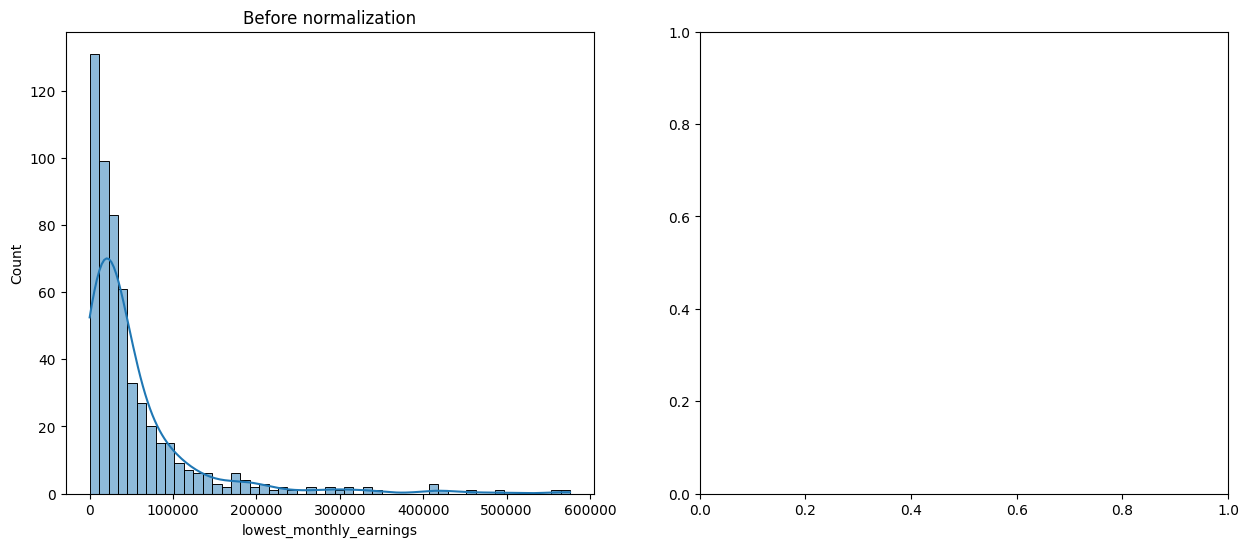

In [41]:
# 데이터 단위 변환 전후 비교
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))   # 데이터 단위 변환 전후를 비교하기 위해 2개의 plot 지정
# 히스토그램으로 변환 전 데이터의 분포 보기
sns.histplot(data=data, x=target_feature, kde=True, ax=ax[0])
ax[0].set_title('Before normalization')
# 히스토그램으로 변환 후 데이터의 분포 보기
sns.histplot(data=data, x=f'norma{target_feature}', kde=True, ax=ax[1])
ax[1].set_title('After normalization')
plt.show()